In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 1


*Derive the interpolating cubic polynomial for the data points (0, 0), (1, 0), (2, 1), and (3, 2) using the monomial basis and the Lagrange basis. Show that these two representations are equivalent. You may need to use NumPy, MATLAB, or other software to solve the linear system for the four degrees of freedom.*

The codes below derive the polynomial interpolation using the monomial basis and the Lagrange basis, and are commented clearly how each step is carried out.

Difference between monomial basis and the Lagrange basis: 
1.68812799656e-16


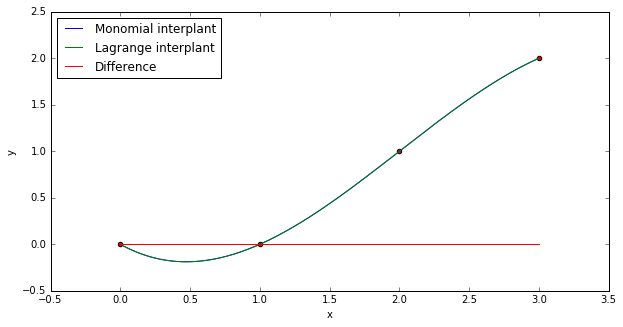

In [347]:
# Function to calculate a polynomial
def f(xx,b):
    z=b[0]
    for i in range(1,len(b)):
        z*=xx
        z+=b[i]
    return z

# Function to evaluate the Lagrange interpolation
def lagr(x,xp,yp):
    lm=0
    for k in range(xp.size):
        xc=xp[k]
        li=1
        for l in range(xp.size):
            if l!=k:
                li*=(x-xp[l])/(xp[k]-xp[l])
        lm+=yp[k]*li
    return lm

x = np.array([0, 1, 2, 3])
y = np.array([0, 0, 1, 2])

V=np.vander(x)
b=np.linalg.solve(V,y)

# Plot interpolant
xx=np.linspace(0,3,301)
yy=np.array([f(q,b) for q in xx])
yy2=np.array([lagr(q,x,y) for q in xx])

# Plot figure using Matplotlib
plt.figure(figsize=(10, 5))
plt.plot(xx,yy, label = 'Monomial interplant')
plt.plot(xx,yy2, label = 'Lagrange interplant')
plt.plot(xx, yy-yy2, label ='Difference')
plt.scatter(x, y, c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 0)
# plt.show()

print 'Difference between monomial basis and the Lagrange basis: \n', np.mean(yy-yy2)


*Conclusion:*

As we can see from the result above, the two representations create almost the same fitting curves with significantly small difference. Thus we can conclude that these two representations are equivalent.

## Problem 2

**(a)** 
The codes below calculate and plot the Lagrange polynomial $p_(n-1)(x)$ and $f(x)$ at the Chebyshev points, where $n = 4$ and range is $[-1, 1]$

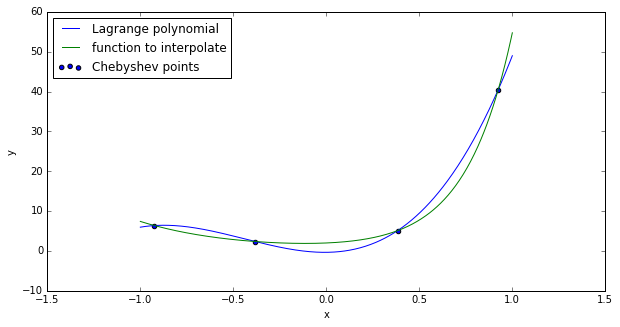

In [232]:
# Function to interpolate
def f(x):
    return exp(4*x) + exp(-2*x) 

# Function to evaluate the Lagrange interpolation
def lagr(x,xp,yp):
    lm=0
    for k in range(xp.size):
        xc=xp[k]
        li=1
        for l in range(xp.size):
            if l!=k:
                li*=(x-xp[l])/(xp[k]-xp[l])
        lm+=yp[k]*li
    return lm

# Control points
n=4
# xp=np.linspace(-1,1,n) # (Linearly spaced)
xp=np.array([cos((2*j+1)*pi/(2*n)) for j in range(n)]) # (Chebyshev points)
yp=np.array([f(q) for q in xp])

# Sample points
xx=np.linspace(-1,1,500)
yy=np.array([lagr(q,xp,yp) for q in xx])
yy1=np.array([f(q) for q in xx])


# Plot figure using Matplotlib
plt.figure(figsize = (10,5))
plt.plot(xx,yy, label = 'Lagrange polynomial')
plt.plot(xx,yy1, label = 'function to interpolate')
plt.scatter(xp, yp, label = 'Chebyshev points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 0)
plt.show()
    

**(b)** The codes below sample the function at 1,000 equally-spaced points over [−1, 1] to calculate infinity norm for function $f$

infinity norm for f - p3 is: 5.75190850272


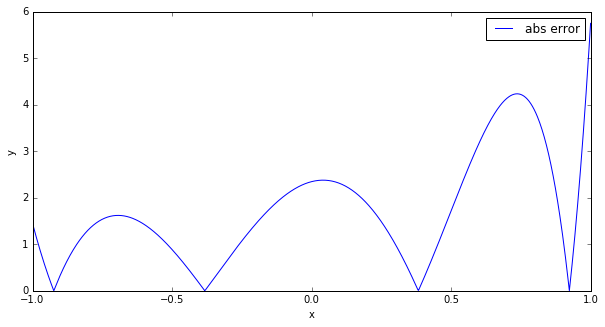

In [233]:
# Sample points
xx=np.linspace(-1,1,1000)
yy=np.array([lagr(q,xp,yp) for q in xx])
yy1=np.array([f(q) for q in xx])

print 'infinity norm for f - p3 is:', np.max(np.absolute(yy1 - yy))
# Plot figure using Matplotlib
plt.figure(figsize = (10,5))
plt.plot(xx, np.absolute(yy1 - yy), label = 'abs error')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 0)
plt.show()
    

*Result:*

From the output and plot above we get the infinity norm for function $f$ on [-1,1] is 5.75190850272.

**(c)** the upper bound of **eq(1)**can be derived as:

$$\frac{4^ne^4 + (-2)^ne^{-2}}{n!}\prod_{j=1}^n 2\sin^2\frac{(2j-1)\pi}{4n}$$

**(d)**

We try to find a cubic polynomal $p_3^+$ such that $||f − p_3^{+}||_{\inf} < ||f − p3||_{\inf}$ by adding perturbations to Chebyshev Points, as shown by the follwoing:

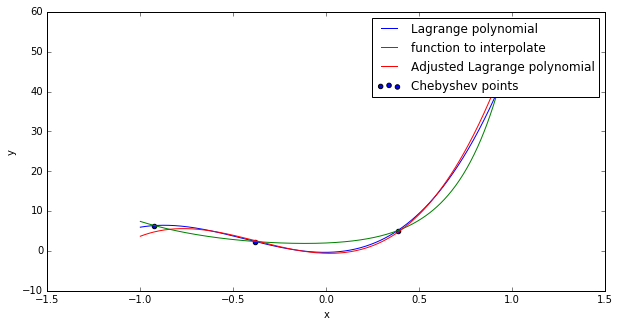

In [236]:
# Function to interpolate
def f(x):
    return exp(4*x) + exp(-2*x) 

# Function to evaluate the Lagrange interpolation
def lagr(x,xp,yp):
    lm=0
    for k in range(xp.size):
        xc=xp[k]
        li=1
        for l in range(xp.size):
            if l!=k:
                li*=(x-xp[l])/(xp[k]-xp[l])
        lm+=yp[k]*li
    return lm

# Control points
n=4
# xp=np.linspace(-1,1,n) # (Linearly spaced)
xp=np.array([cos((2*j+1)*pi/(2*n)) for j in range(n)]) # (Chebyshev points)
yp=np.array([f(q) for q in xp])

# Add optional random perturbation
xp_adjusted = xp + 1e-1*np.random.rand(n);
yp_adjusted = np.array([f(q) for q in xp_adjusted])

V=np.vander(xp)
b=np.linalg.solve(V,yp)
# Add optional random perturbation
b+=1e-3*np.random.rand(n);

# Sample points
xx=np.linspace(-1,1,500)
yy=np.array([lagr(q,xp,yp) for q in xx])
yy_adjusted = np.array([lagr(q,xp_adjusted,yp_adjusted) for q in xx])
yy1=np.array([f(q) for q in xx])


# Plot figure using Matplotlib
plt.figure(figsize = (10,5))
plt.plot(xx,yy, label = 'Lagrange polynomial')
plt.plot(xx,yy1, label = 'function to interpolate')
plt.plot(xx,yy_adjusted, label = 'Adjusted Lagrange polynomial')

plt.scatter(xp, yp, label = 'Chebyshev points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
    

We further calculate and plot the absolute errors for both the original interpolation and the interpolation using perturbed Chebyshev points:

infinity norm for f - p3 is: 5.75190850272
infinity norm for f - p3* is: 5.21033197779


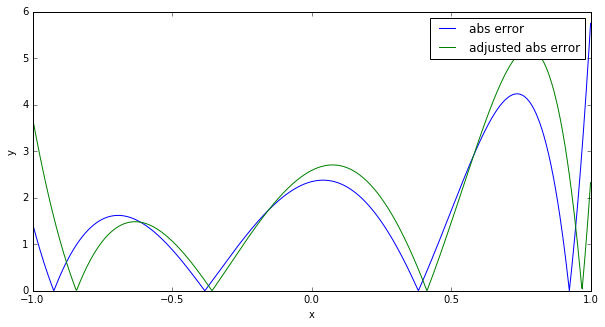

In [237]:
# Sample points
xx=np.linspace(-1,1,1000)
yy=np.array([lagr(q,xp,yp) for q in xx])
yy_adjusted = np.array([lagr(q,xp_adjusted,yp_adjusted) for q in xx])
yy1=np.array([f(q) for q in xx])

print 'infinity norm for f - p3 is:', np.max(np.absolute(yy1 - yy))
print 'infinity norm for f - p3* is:', np.max(np.absolute(yy1 - yy_adjusted))
# Plot figure using Matplotlib
plt.figure(figsize = (10,5))
plt.plot(xx, np.absolute(yy1 - yy), label = 'abs error')
plt.plot(xx, np.absolute(yy1 - yy_adjusted), label = 'adjusted abs error')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

As shown above, by perturbing the original Chebyshev points used for interpolating cubic polynomial, we are able to reduce the infinity norm from 5.75 to 5.21 that satisfies $||f − p_3^{+}||_{\inf} < ||f − p3||_{\inf}$.

## Problem 3

** (a) Find two 2 × 2 invertible matrices B and C such that $κ(B + C) < κ(B) + κ(C)$.**

$$
B=
\begin{bmatrix}
    \frac{1}{6} & 0\\
    0 & \frac{1}{3}
\end{bmatrix}
C=
\begin{bmatrix}
    \frac{1}{6} & 0\\
    0 & \frac{1}{12}
\end{bmatrix}
$$

In [244]:
B = np.array([[1.0/6, 0], [0, 1.0/3]])
C = np.array([[1.0/6, 0],[0, 1.0/12]])

print 'cond(B):', np.linalg.cond(B)
print 'cond(C):', np.linalg.cond(C)
print 'cond(B) + cond(C):', np.linalg.cond(B) + np.linalg.cond(C)
print 'cond(B + C):', np.linalg.cond(B + C)

cond(B): 2.0
cond(C): 2.0
cond(B) + cond(C): 4.0
cond(B + C): 1.25



** (b) Find two 2 × 2 invertible matrices B and C such that $κ(B + C) > κ(B) + κ(C)$.**

$$
B: 
\begin{bmatrix}
    1 & 0\\
    0 & 1
\end{bmatrix}
C:
\begin{bmatrix}
    0.1 & 1\\
    1 & 0.1
\end{bmatrix}
$$

In [239]:
B = np.array([[1.0, 0], [0, 1.0]])gfdz
C = np.array([[0.1, 1],[1, 0.1]])

print 'cond(B):', np.linalg.cond(B)
print 'cond(C):', np.linalg.cond(C)
print 'cond(B) + cond(C):', np.linalg.cond(B) + np.linalg.cond(C)
print 'cond(B + C):', np.linalg.cond(B + C)

B: 1.0
C: 1.22222222222
cond(B) + cond(C): 2.22222222222
cond(B + C): 21.0


**(c) ** Suppose that A is a symmetric invertible 2 × 2 matrix. Find $κ(2A)$ and $κ(A^2)$ in terms of $κ(A)$.

$$κ(2A) = \|2A\| \|(2A)^{-1}\| = 2^2*\|A\| {\frac{1}{2}} ^ 2\|(A)^{-1}\| = \|A\|\|A^{-1}\| = κ(A)$$

From linear algebra we know that any symmetric matrix A can be diagonalized by an orthogonal matrix. Specifically,

$$A = R^TDR$$ where $D$ is diagonal, and $R$ is orthgonal, so that $R^TR=RR^T=I$, hence we have:

$$κ(A^2) = κ((R^TDR)(R^TDR)) = κ(R^TD^2R)$$

$$κ(A) = κ(R^TDR)$$

since orthogonal matrices preserve Euclidean vector norms, that is, $\|R\vec v\|_2^2=\|\vec v\|_2^2$  for any vector $\vec v \in \R $; and $κ(A) = \|αβ^{-1}\|, where \|\alpha\| > \|\beta\|$, we finally have:

$$κ(A^2) = κ(A) ^2$$

**(d)**

If A is not symmetric,$ κ(2A) == κ(A)$ still holds since the proof does not involve any properties of symmetry. However, $κ(2A)$ does not hold since for unsymmetric $A$, it may not be diagonalized by an orthogonal matrix. 

*Counterexample*:

Consider the following unsymmetric matrix:

$$
CE =  
\begin{bmatrix}
    1 & 2\\
    3 & 4
\end{bmatrix}
$$

In [285]:
CE = np.array(((1,2),(3,4)))

In [289]:
print 'Condition number of A (unsymmetric)', np.linalg.cond(CE) 
print 'Condition number of A^2', np.linalg.cond(CE*CE)  

Condition number of A (unsymmetric) 14.9330343737
Condition number of A^2 17.6433213293


## Problem 4

**(a) & (b)**

Here we construct a cubic spline $sx (t)$ that is piecewise cubic in the four intervals [0, 1), [1, 2), [2, 3), and [3, 4), and we further compare it with sine function:

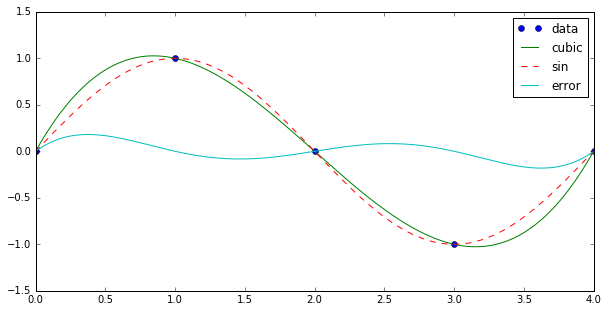

mean error: 1.86331137e-16
Absolute mean error: 0.0832487512488


In [305]:
#!/usr/bin/python
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
# Construct splines for two sets of similar data points
x=np.array([0,1,0,-1,0])
t=np.linspace(0,4,5)
sx=interp1d(t,x,kind='cubic')

# Plot the splines and data
tnew=np.linspace(0,4,1001)
plt.plot(t,x,'o',tnew,sx(tnew),'-', tnew, np.sin(tnew * np.pi /2.0), '--', tnew,sx(tnew)-np.sin(tnew * np.pi /2.0),'-')
plt.legend(['data','cubic', 'sin', 'error'], loc='best')
plt.show()

print 'mean error:', np.mean(sx(tnew)-np.sin(tnew * np.pi /2.0))
print 'Absolute mean error:', np.mean(np.absolute(sx(tnew)-np.sin(tnew * np.pi /2.0)))


As we can see from the plot above, the cubic spline we constructed is pretty similar to the sine function, with absolute mean error less than 0.1.

**(c) plot second cubic spline $sy(t)$ that goes through the four points (0,1), (1, 0), (2, −1), and (3, 0). ** Again, we compare it with cosine function.

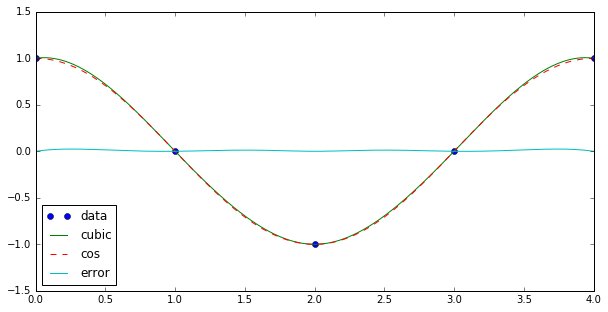

mean error: 0.00924986124986
Absolute mean error: 0.00929962399582


In [320]:
#!/usr/bin/python
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
# Construct splines for two sets of similar data points
sy=interp1d(t,x2,kind='cubic')

# Plot the splines and data
plt.plot(t,x2,'o',tnew, sy(tnew),'-', tnew, np.cos(tnew * np.pi /2.0), '--', tnew, sy(tnew)-np.cos(tnew * np.pi /2.0),'-')
plt.legend(['data','cubic', 'cos', 'error'],loc='best')
plt.show()

print 'mean error:', np.mean(sy(tnew)-np.cos(tnew * np.pi /2.0))
print 'Absolute mean error:', np.mean(np.absolute(sy(tnew)-np.cos(tnew * np.pi /2.0)))



As we can see from the plot above, the second cubic spline we constructed is pretty similar to the cosine function, with absolute mean error less than 0.01.

**(d) In the xy-plane, plot the parametric curve $(sx(t), sy(t))$ for t ∈ [0, 4) as below: **



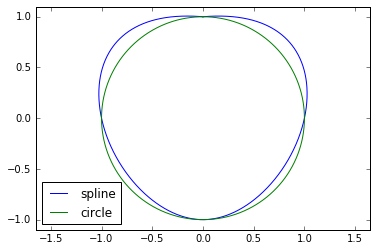

In [319]:
plt.plot(sx(tnew), sy(tnew), label = 'spline')
plt.plot(np.sin(tnew * np.pi / 2), np.cos(tnew * np.pi / 2), label="circle")

plt.axis('equal')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

plt.legend(loc = 0)

We then implement a function called *enclosed_area* which calculates the area enclosed by the parametric curve. According to $A = πr^2$, we can directly use the estimated area to approach $\pi$.

In [308]:
def enclosed_area(sx, sy):
    if len(sx) != len(sy):
        raise ValueError('sx and sy must have same length.')
        
    prev_x = sx[0]
    prev_y = sy[0]
    s = 0
    for i in range(1, len(sx)):
        cur_x = sx[i]
        cur_y = sy[i]
        
        dx = cur_x - prev_x
        y = (cur_y + prev_y) / 2
        s += dx * y
        
        prev_x = cur_x
        prev_y = cur_y 
    return s

Hence, $\pi$ is estimated as:

In [309]:
enclosed_area(sx(tnew), sy(tnew))

3.2617056790528065

$$\pi \approx 3.26171$$

In [221]:
result

(0.6156264703860143, 6.834826819912701e-15)

## Problem 5

**(a) Reconstructing the regular photo from the three low-light photos **

** Step 1: Read in images **


In [429]:
import numpy as np
from skimage import io

# Step 1: Read in images
low1=io.imread("am205_hw1_files/problem5/right_side/375x250/low1.png")
low2=io.imread("am205_hw1_files/problem5/right_side/375x250/low2.png")
low3=io.imread("am205_hw1_files/problem5/right_side/375x250/low3.png")
orig = io.imread("am205_hw1_files/problem5/right_side/375x250/regular.png")


**Step 2: Extract different channels so that later we could do least square regression seperately on different channels**


In [430]:
low1_ch = []
for i in range(3):
    low1_ch.append(low1[:,:,i].reshape((250*375,)))
low2_ch = []
for i in range(3):
    low2_ch.append(low2[:,:,i].reshape((250*375,)))
low3_ch = []
for i in range(3):
    low3_ch.append(low3[:,:,i].reshape((250*375,)))
    
orig_ch = []
for i in range(3):
    orig_ch.append(orig[:,:,i].reshape((250*375,)))


** Step 3: least square regression on each channel**

In [431]:
pix_num = 250*375
intercept = np.ones((250*375,))
coefs = []
intercepts = []
residuals = []
for i in range(3):
    V = np.array((low1_ch[i], low2_ch[i], low3_ch[i],intercept)).T
    y = orig_ch[i]
    res=np.linalg.lstsq(V,y)
    
    coefs.append(res[0][:-1])
    intercepts.append(res[0][-1])
    residuals.append(res[1])

** Step 4: Construct coefficient matrices and p_const **


In [432]:
F_b = np.diag(np.array((coefs[0][0], coefs[1][0], coefs[2][0])))
F_c = np.diag(np.array((coefs[0][1], coefs[1][1], coefs[2][1])))
F_d = np.diag(np.array((coefs[0][2], coefs[1][2], coefs[2][2])))
p_const = intercepts

**Step 5: Reconstruct regular image and calculate reconstruction error**

Reconstruction Error (given by eq(3)):  1764.5320424


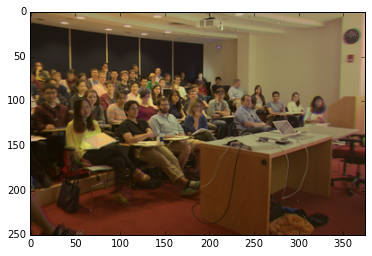

In [433]:
new = (low1.reshape((250*375,3)).dot(F_b) + low2.reshape((250*375,3)).dot(F_c) + \
low3.reshape((250*375,3)).dot(F_d) + np.array([p_const] * (250*375))) 

S = np.sum(np.square(orig.reshape((250*375,3)) - new)) / (250*375.0)
print 'Reconstruction Error (given by eq(3)): ', S
new = new.reshape((250, 375, 3))
# Show image
plt.imshow(new/256.0)
plt.show()

Compare it with original image:

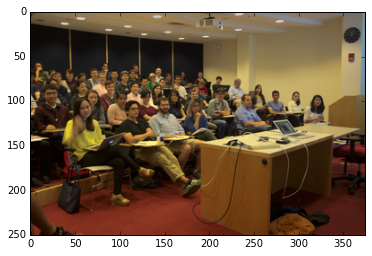

In [434]:
plt.imshow(orig/256.0)
plt.show()

As we can see, We have successfully reconstruct a regular image using the pixel values given by $Eq. 2$, and  the error $S$ given by $Eq. 3$ is 1764.5320424.

**(b) Try on the left-side using fitted model from part (a)**

In [435]:
import numpy as np
from skimage import io

# Step 1: Read in images
low1=io.imread("am205_hw1_files/problem5/left_side/375x250/low1.png")
low2=io.imread("am205_hw1_files/problem5/left_side/375x250/low2.png")
low3=io.imread("am205_hw1_files/problem5/left_side/375x250/low3.png")
orig = io.imread("am205_hw1_files/problem5/left_side/375x250/regular.png")


Reconstruction Error (given by eq(3)):  2507.31172818


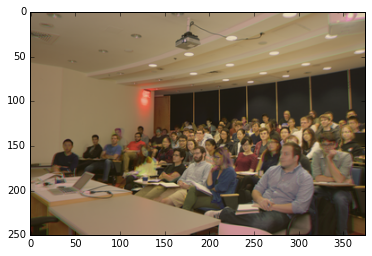

In [436]:
new = (low1.reshape((250*375,3)).dot(F_b) + low2.reshape((250*375,3)).dot(F_c) + \
low3.reshape((250*375,3)).dot(F_d) + np.array([p_const] * (250*375))) 

S = np.sum(np.square(orig.reshape((250*375,3)) - new)) / (250*375.0)
print 'Reconstruction Error (given by eq(3)): ', S
new = new.reshape((250, 375, 3))
# Show image
plt.imshow(new/256.0)
plt.show()

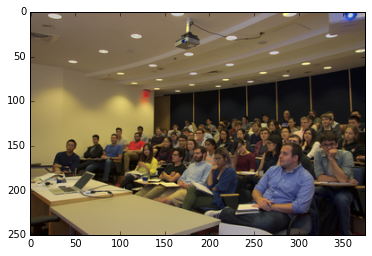

In [437]:
plt.imshow(orig/256.0)
plt.show()

Again, the reconstruction for a regular image using the fitted model from part (a) also perform really well, and the error $S$ given by $Eq. 3$ is 2507.31172818.